In [5]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd

## Preprocessing 

Copied from previous section

In [6]:
def get_data():
    df = pd.read_csv('../data/ecommerce_data.csv')
    # turn it into numpy matrix
    data = df.as_matrix()
    
    # Y is the last column, so X is everything else
    X = data[:,:-1]
    Y = data[:, -1]
    
    # Normalize numerical columns
    X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
    X[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()
    
    # Work on category column
    # Get shape of original X and make new one with shape of NxD+3 (there are 4 categories)
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    # Most of X is going to be the same 0:D-1 column
    X2[:,0:(D-1)] = X[:,0:(D-1)]
    
    # one hot encoding for others
    # Get time of day (0/1/2/3) and set this value in X2 to 1
    for n in range(N):
        t = int(X[n,D-1])
        X2[n,t+D-1] = 1
        
        # method 2
    # Z = np.zeros((N, 4))
    # Z[np.arange(N), X[:,D-1].astype(np.int32)] = 1
    # # assign: X2[:,-4:] = Z
    # assert(np.abs(X2[:,-4:] - Z).sum() < 1e-10)
    
    return X2, Y

In [7]:
# For logistics class we only want binary data so we'll only use classes 0 and 1
def get_binary_data():
    # return only the data from the first 2 classes
    X, Y = get_data()
    X2 = X[Y <= 1]
    Y2 = Y[Y <= 1]
    return X2, Y2

In [8]:
X, Y = get_binary_data()
# Shuffle
X, Y = shuffle(X, Y)

In [10]:
# Create train and test sets
Xtrain = X[:-100]
Ytrain = Y[:-100]
Xtest = X[-100:]
Ytest = Y[-100:]

In [11]:
D = X.shape[1]
W = np.random.randn(D)
b = 0

In [13]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

def classification_rate(Y, P):
    # Returns divides number of correct vs total numbers
    return np.mean(Y == P)

In [14]:
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))

In [16]:
train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)
    
    # costs
    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    
    # append to costs
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    # Gradient descent - vectorized versions of equations
    W -= learning_rate * Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate * (pYtrain - Ytrain).sum()
    if i % 1000 == 0:
        print(i, ctrain, ctest)

0 1.24990706685 1.13176615639
1000 0.199760329375 0.142956028998
2000 0.198325779312 0.141982650012
3000 0.198230743911 0.141987654029
4000 0.198222741194 0.142006166645
5000 0.198222025263 0.142013119019
6000 0.198221960089 0.142015340575
7000 0.198221954124 0.142016023617
8000 0.198221953578 0.142016231386
9000 0.198221953528 0.142016294389


In [18]:
print("Final train classification_rate:", classification_rate(Ytrain, np.round(pYtrain)))
print("Final test classification_rate:", classification_rate(Ytest, np.round(pYtest)))

Final train classification_rate: 0.96644295302
Final test classification_rate: 0.95


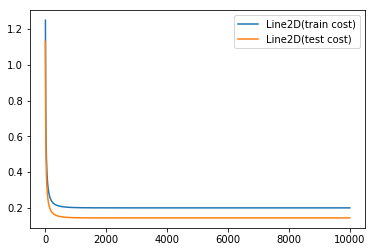

In [19]:
legend1, = plt.plot(train_costs, label="train cost")
legend2, = plt.plot(test_costs, label="test cost")
plt.legend([legend1, legend2])
